### Notebook for computing the relic neutrino density in KFT from the direct integral expression

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys

font = {'size'   : 22}
matplotlib.rc("font", **font)
matplotlib.rc(["text.usetex", True])


sys.path.insert(0,'../source/')
import model 
import direct
import utils

-------- **Specify input below** --------

In [2]:
x_here = np.array([8.0, 0.0, 0.0])
mass = 0.05

# precision parameters
N_theta, N_phi = 1, 1
N_y_exact = 10

y_binning_method = 'laggauss' # options: linear, log, laggauss
y_max = 10 # only used when method is not laggauss
eps   = 1e-3  # step-size for numerical differentiation of particle trajectories
atol  = 1e-12 # precision parameters for the shooting algorithm
rtol  = 1e-14

z_ini = 3

-------- **Automatic from here** --------

In [3]:
z_span = [z_ini, 0]
bins   = [N_y_exact, N_theta, N_phi]
model.mnu = mass

int_free_analytical = 4*np.pi*1.803*model.Tnu**3
print(f"The analytical free integral is {int_free_analytical:.3}.")

The analytical free integral is 1.07e-10.


In [4]:
timer = time()
integral, int_free, dets, initials = direct.compute_integral_serial(bins, model.Tnu, x_here, eps, z_span, 
                                                                    y_binning=y_binning_method, y_max=y_max,
                                                                    interp=True, abstol=atol, reltol=rtol, silent=True)
print(f"\nAt m={mass:.5} eV: direct={integral:.5} with bins={bins} after {time() - timer:.4} seconds")
print(f"direct/free = {integral/int_free_analytical:.5}")

/Users/au566942/miniforge3/envs/classpp/lib/python3.10/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "



At m=0.05 eV: direct=1.7329e-10 with bins=[10, 1, 1] after 15.73 seconds
direct/free = 1.6235


**Plot the determinants found from the computation above**

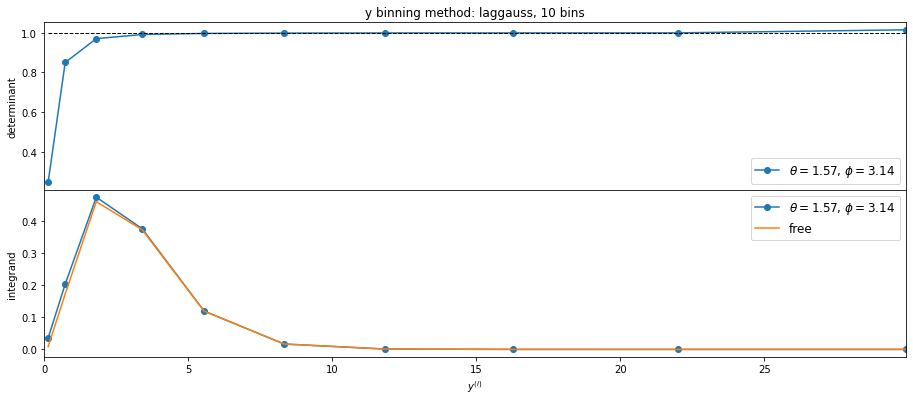

In [5]:
theta_ids = [0]
phi_ids   = [0]
N_y, N_theta, N_phi = bins[0], bins[1], bins[2]

y_list, y_weights = utils.get_y_binning(N_y, y_max=y_max, method=y_binning_method)
theta_list, theta_weights, phi_list, phi_weights = utils.get_angular_binning(N_theta, N_phi)

fig, ax = plt.subplots(2, 1, figsize=[14,6])
ax[0].set_title(f'y binning method: {y_binning_method}, {N_y} bins')
for idx_th in theta_ids:
    for idx_phi in phi_ids:
        ax[0].plot(y_list, dets[:, idx_th, idx_phi], 'o-', label=fr'$\theta=${theta_list[idx_th]:.3}, $\phi=${phi_list[idx_phi]:.3}')
        ax[1].plot(y_list, y_list**2/(1 + np.exp(y_list))/dets[:, idx_th, idx_phi], 'o-', label=fr'$\theta=${theta_list[idx_th]:.3}, $\phi=${phi_list[idx_phi]:.3}')
#        ax[1].plot(y_list[1:], 1/(1 + np.exp(y_list[1:]))/determinants[1:, idx_th, idx_phi], 'o-', label=fr'$\theta=${theta_list[idx_th]:.3}, $\phi=${phi_list[idx_phi]:.3}')
ax[0].plot(y_list, np.ones(len(y_list)), 'k--', lw=1)
ax[0].set(xlim=[0, max(y_list)], xticks=[], ylabel='determinant')
ax[0].legend(fontsize=12)
#ax[0].set_ylim([0, 1])
ax[1].plot(y_list, y_list**2/(1 + np.exp(y_list)), '-', label='free')
#ax[1].plot(y_list[1:], 1/(1 + np.exp(y_list[1:])), '-', label='free')
ax[1].set(xlim=[0, max(y_list)], xlabel=r'$y^{(i)}$', ylabel='integrand')
ax[1].legend(fontsize=12)
fig.subplots_adjust(wspace=0.2, hspace=0, left=0.12, right=0.975, bottom=0.125, top=0.9)